# Assignment 2 (5 Marks)

Please indicate your name and student id clearly in the submission title and in the file. 

Name: Jonatham Chang

Student ID:  190787860

## Question 1

Please use the same data set as in Assignment 1 for the following plot. 

Visualize the time series: Regular Unleaded Gasoline price in "London" from 2000 to 2022. Smooth the time series using simple moving average with windowsize=5.

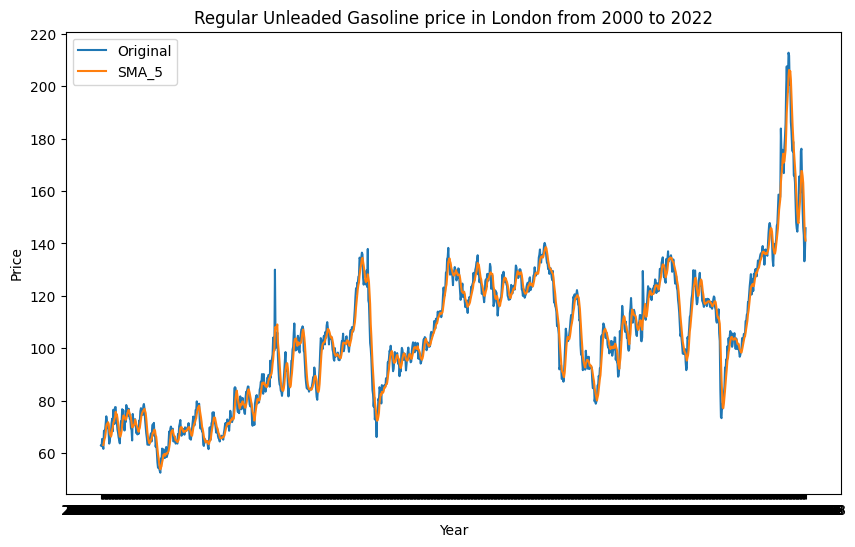

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file
df = pd.read_csv('data/fueltypesall1991-2023.csv')

# Filter data for Regular Unleaded Gasoline in London from 2000 to 2022
df_london_gas = df[(df['Date'] >= '2000-01-01') & (df['Date'] <= '2022-12-31') & (df['Fuel Type'] == 'Regular Unleaded Gasoline')][['Date', 'London']]

# Apply simple moving average with window size of 5
df_london_gas['SMA_5'] = df_london_gas['London'].rolling(window=5).mean()

# Set Date column as index
df_london_gas.set_index('Date', inplace=True)

# Plot the data
plt.figure(figsize=(10,6))
plt.plot(df_london_gas['London'], label='Original')
plt.plot(df_london_gas['SMA_5'], label='SMA_5')
plt.title('Regular Unleaded Gasoline price in London from 2000 to 2022')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()


## Question 2

The following data set includes the volcanos in the world. 
https://github.com/plotly/datasets/blob/master/volcano_db.csv

Please plot a map with three countries: Canada, US and Mexico. Show the exact locations (latitude and longitude) of the volcanos on this map.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


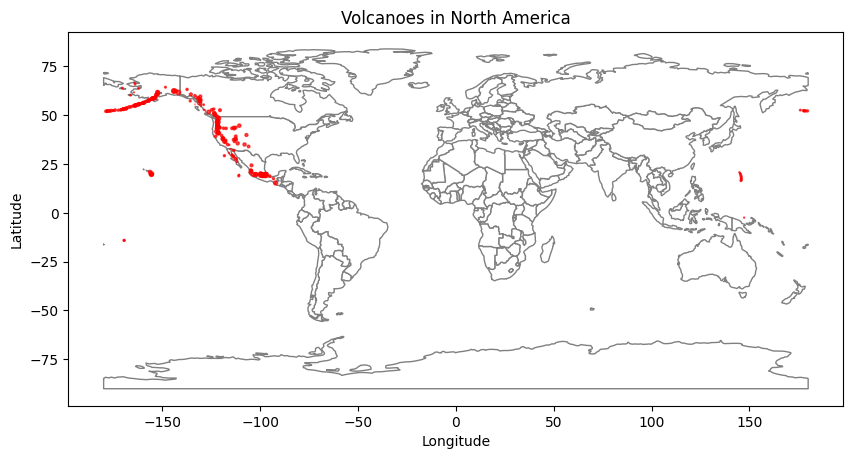

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 

# read volcano data
volcano_data = pd.read_csv('data/volcano_db.csv', encoding = "ISO-8859-1")

# filter volcano data for Canada, US, and Mexico
countries = ['Canada', 'United States', 'Mexico']
volcanoes = volcano_data[volcano_data['Country'].isin(countries)]

# create geopandas dataframe for volcanoes
volcanoes_gdf = gpd.GeoDataFrame(
    volcanoes, 
    geometry=gpd.points_from_xy(volcanoes.Longitude, volcanoes.Latitude)
)

# read world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# filter world map for Canada, US, and Mexico
north_america = world[world['name'].isin(countries)]

# plot world map and volcanoes
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='white', edgecolor='gray')
#north_america.plot(ax=ax, color='white', edgecolor='gray')
volcanoes_gdf.plot(ax=ax, markersize=volcanoes_gdf.Elev/500, color='red', alpha=0.7)
plt.title('Volcanoes in North America')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
